# 1. Importing all necessary libs and modules

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# 2. Reading and filtered data

In [2]:
# The Normal and Cancerous Samples
df_cancer = pd.read_csv("filtered/cancer.csv", sep=",")
df_healthy= pd.read_csv("filtered/normal.csv", sep=",")

# The Results of hypothesis testing on the paired data 
paired= pd.read_csv("filtered/paired_fdr_2sided.csv",sep=",")
paired

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,normality,p,stat,expressed,fdr_hypothesis,fdr,corrected
0,0,HIST3H2A,92815,NOT,1.008929e-08,44.0,True,True,4.682766e-08,False
1,1,LIN7B,64130,NORMAL,2.384960e-01,494.0,False,False,2.756234e-01,False
2,2,LXN,56925,NOT,1.725267e-06,142.0,True,True,4.290195e-06,False
3,3,CNKSR2,22866,NORMAL,1.265880e-08,48.0,True,True,5.630297e-08,False
4,4,SCML1,6322,NORMAL,1.601853e-02,388.0,True,True,2.223009e-02,False
...,...,...,...,...,...,...,...,...,...,...
17270,17270,ZNF521,25925,NaN,8.775508e-06,177.0,True,True,1.934868e-05,False
17271,17271,SPINT2,10653,NaN,4.778330e-09,31.0,True,True,2.616344e-08,False
17272,17272,HAVCR2,84868,NaN,3.366814e-09,25.0,True,True,2.030077e-08,False
17273,17273,CTD-2116N17.1,0,NaN,2.964334e-09,16.0,True,True,1.858329e-08,False


In [3]:
df_cancer

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,19641,ZNF521,25925,37.32,76.71,59.97,84.04,14.24,202.66,435.55,...,22.59,33.78,148.09,106.63,297.17,22.26,25.72,106.63,71.00,37.05
17271,19642,SPINT2,10653,56265.94,3901.01,16843.62,12244.81,37901.36,8479.89,9606.86,...,18052.61,15392.14,20030.74,20593.91,9808.75,11189.60,10733.74,10014.87,6983.79,23169.48
17272,19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
17273,19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


In [4]:
df_healthy.iloc[:,3:]

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,54.33,15.56,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,175.07,147.06,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,603.67,555.41,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,28.04,39.22,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,120.10,239.52,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,215.77,148.09,83.45,232.94,167.90,80.01,161.02,104.42,81.14,113.56,...,145.02,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26
17271,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,6516.03,8598.28,5633.22,...,3955.48,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55
17272,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,363.56,366.09,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
17273,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,1.41,0.00,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


# 3. Calculate Fold Change Parameters

In [5]:
# A column to hold the Avg. value of every sample's gene expressions
df_cancer['average_GE']=df_cancer.iloc[:,3:].mean(axis=1)
df_healthy['average_GE']=df_healthy.iloc[:,3:].mean(axis=1)

# df_cancer['average_GE']

In [6]:
# df_healthy['average_GE']

In [7]:
# Creating a DataFrame to hold the Fold Change Data
FC = pd.DataFrame()

# Initialize it with the genes' names and IDs
FC['Hugo_Symbol'] = df_cancer['Hugo_Symbol']
FC['Entrez_Gene_Id'] = df_cancer['Entrez_Gene_Id']

# FC

In [8]:
# Apply the fold change equation (Gene expression level under the diseased condition/Gene expression level under the normal condition)
FC['FC']=df_cancer['average_GE']/df_healthy['average_GE']

FC

,Hugo_Symbol,Entrez_Gene_Id,FC
0,HIST3H2A,92815,5.337707
1,LIN7B,64130,1.090204
2,LXN,56925,0.565997
3,CNKSR2,22866,0.337256
4,SCML1,6322,0.829034
...,...,...,...
17270,ZNF521,25925,0.491668
17271,SPINT2,10653,2.233120
17272,HAVCR2,84868,0.397428
17273,CTD-2116N17.1,0,5.835301


In [9]:
# FC measures the change in units of the normal GE level
# Log-transform the FC to base 2 
FC['log2FC']=np.log2(FC['FC'])
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC
0,HIST3H2A,92815,5.337707,2.416220
1,LIN7B,64130,1.090204,0.124599
2,LXN,56925,0.565997,-0.821133
3,CNKSR2,22866,0.337256,-1.568083
4,SCML1,6322,0.829034,-0.270496
...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243
17271,SPINT2,10653,2.233120,1.159061
17272,HAVCR2,84868,0.397428,-1.331234
17273,CTD-2116N17.1,0,5.835301,2.544807


In [10]:
# Calculating the absolute value (The Change is a +ve quantitiy)
FC['ABS']=FC['log2FC'].abs()
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS
0,HIST3H2A,92815,5.337707,2.416220,2.416220
1,LIN7B,64130,1.090204,0.124599,0.124599
2,LXN,56925,0.565997,-0.821133,0.821133
3,CNKSR2,22866,0.337256,-1.568083,1.568083
4,SCML1,6322,0.829034,-0.270496,0.270496
...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243
17271,SPINT2,10653,2.233120,1.159061,1.159061
17272,HAVCR2,84868,0.397428,-1.331234,1.331234
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807


In [11]:
# Set a threshold to apply to FC
Threshold=math.log(1.5,2)
Threshold

0.5849625007211562

In [12]:
# Set a condition to decide significance 
# FC values less than threshold doesn't indicate significance
FC.loc[FC['ABS'] < Threshold, 'segnificant'] = 0 
# FC values >= threshold indicates significance
FC.loc[FC['ABS'] >= Threshold, 'segnificant'] = 1
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant
0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0
1,LIN7B,64130,1.090204,0.124599,0.124599,0.0
2,LXN,56925,0.565997,-0.821133,0.821133,1.0
3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0
4,SCML1,6322,0.829034,-0.270496,0.270496,0.0
...,...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0
17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0
17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0


In [13]:
# Significant genes are expressed
FC.loc[FC['segnificant'] ==1, 'expressed'] = 'expressed' 

# Non-Significant genes are not expressed
FC.loc[FC['segnificant'] ==0 , 'expressed'] = 'not expressed' 
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed
0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0,expressed
1,LIN7B,64130,1.090204,0.124599,0.124599,0.0,not expressed
2,LXN,56925,0.565997,-0.821133,0.821133,1.0,expressed
3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0,expressed
4,SCML1,6322,0.829034,-0.270496,0.270496,0.0,not expressed
...,...,...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0,expressed
17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0,expressed
17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0,expressed
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0,expressed


In [14]:
# A function to calculate expression level based on log2FC value
def f(x):  
    # While the gene is expressed: if Log2FC is positive, the gene is Over expressed
    if x['log2FC'] > 0 and x['expressed'] == 'expressed': return 'over expressed'
    # While the gene is expressed: if Log2FC is negative, the gene is Under expressed
    elif x['log2FC'] < 0 and x['expressed'] == 'expressed': return 'under expressed'
    # Otherwise the gene is still not expressed
    else: return 'not expressed'

# Apply the function on the expression column
FC['expressed'] = FC.apply(f, axis=1)
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed
0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0,over expressed
1,LIN7B,64130,1.090204,0.124599,0.124599,0.0,not expressed
2,LXN,56925,0.565997,-0.821133,0.821133,1.0,under expressed
3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0,under expressed
4,SCML1,6322,0.829034,-0.270496,0.270496,0.0,not expressed
...,...,...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0,under expressed
17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0,over expressed
17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0,under expressed
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0,over expressed


## Plotting The Log-Transformed Fold Change Values for every gene

In [15]:
# Creating a color list for the FC plot
cc=['r']*len(FC['log2FC'])

for n,val in enumerate(FC['log2FC']):
    if val<0:
        # Assign Blue color for Negative values 
        cc[n]='b'
    elif val>=0:
        # Assign Red color for Positive values 
        cc[n]='r'

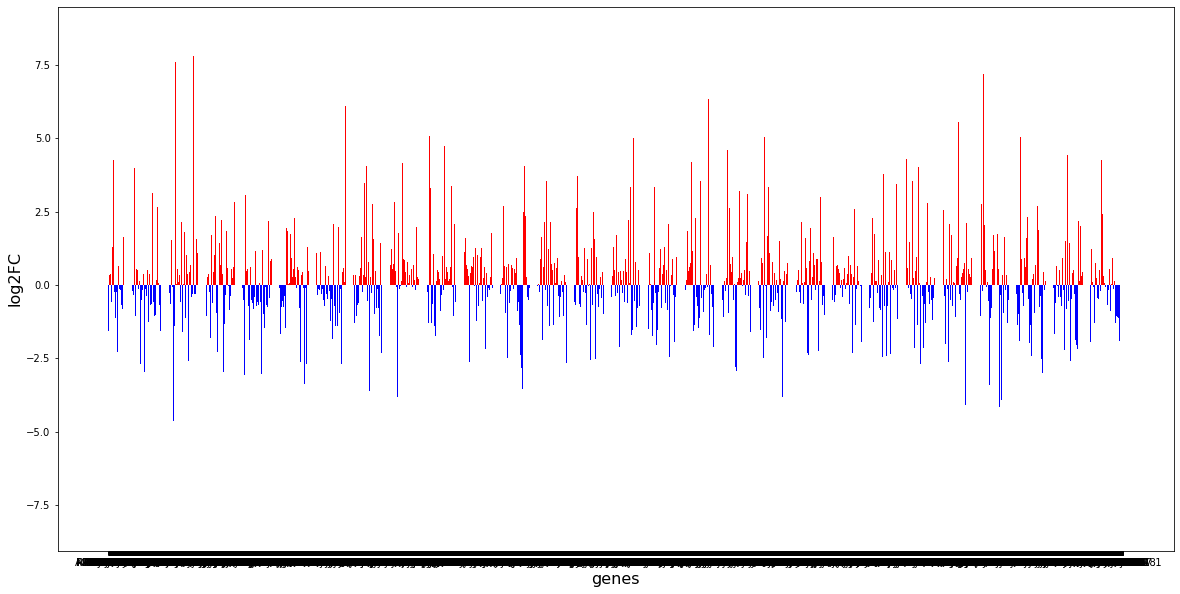

In [16]:
# Plot the Log-transformed FC for every gene
plt.figure(figsize=(20,10))
plt.bar(FC["Hugo_Symbol"],FC['log2FC'],color=cc)
plt.xlabel('genes', fontsize=16)
plt.ylabel('log2FC', fontsize=16)
plt.show()

# 4. Volcano Plot
- Combining Hypothesis Test (For the paired data) and FC  to infer DEGs

In [17]:
# We consider the FDR-Corrected P-Values of the Wilcoxon test to plot the Volcano Plot
# paired['fdr'].min()

In [18]:
# Log-Transform the fdr-corrected p-Values (Significance level) to base 10
FC['segnificance (-log10)']=-np.log10(paired['p'])

In [19]:
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed,segnificance (-log10)
0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0,over expressed,7.996139
1,LIN7B,64130,1.090204,0.124599,0.124599,0.0,not expressed,0.622519
2,LXN,56925,0.565997,-0.821133,0.821133,1.0,under expressed,5.763144
3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0,under expressed,7.897608
4,SCML1,6322,0.829034,-0.270496,0.270496,0.0,not expressed,1.795377
...,...,...,...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0,under expressed,5.056728
17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0,over expressed,8.320724
17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0,under expressed,8.472781
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0,over expressed,8.528073


## Plotting the Volcano Plot

In [38]:
def get_number_of_elements(list,comp):
    count = 0
    for element in list:
        if element == comp:
            count += 1
    print(count)
    return count

In [21]:
# Creating a color list for the Volcano plot
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        # Assign Blue color for Negative values 
        cc[n]='b'
    elif val>0:
        # Assign Red color for Positive values 
        cc[n]='r'


<function matplotlib.pyplot.show(close=None, block=None)>

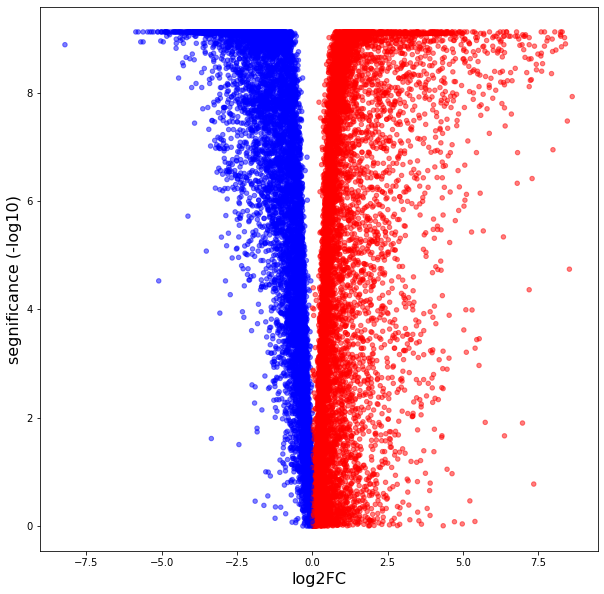

In [22]:
# Plot the volcano plot between hypothesis and FC results 
# (Scatter between FDR-Corrected Wolcoxon Significance Level and Log-Transformed FC value)
plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance (-log10)'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance (-log10)', fontsize=16)
plt.show


In [23]:
# Considering the expression level by changing the color mapping
cc=['g']*len(FC['expressed'])
for n,val in enumerate(FC['expressed']):
    # Red if Over Expressed
    if val== 'over expressed':
        cc[n]='r'
    # Blue if Under Expressed
    elif val=='under expressed':
        cc[n]='b'
# Gray if not Expressed
for n,val in enumerate(FC['expressed']):
    if val=='not expressed':
        cc[n]='gray'


<function matplotlib.pyplot.show(close=None, block=None)>

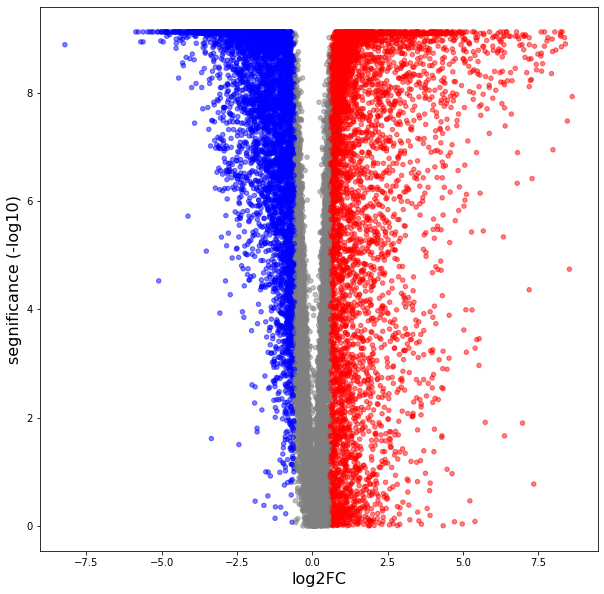

In [24]:
# Volcano Plot after considering Expression level
plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance (-log10)'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance (-log10)', fontsize=16)
plt.show


In [25]:
# Considering the log-transformed significance level by changing the color mapping
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    # Blue for Negative log FC
    if val<0:
        cc[n]='b'
    # Red for positive log FC
    elif val>0:
        cc[n]='r'
# Gray for genes with FDR Significance less than -0.05 (But log transformed to base 10)
for n,val in enumerate(FC['segnificance (-log10)']):
    if val<-math.log(5/100,10):
        cc[n]='gray'


<function matplotlib.pyplot.show(close=None, block=None)>

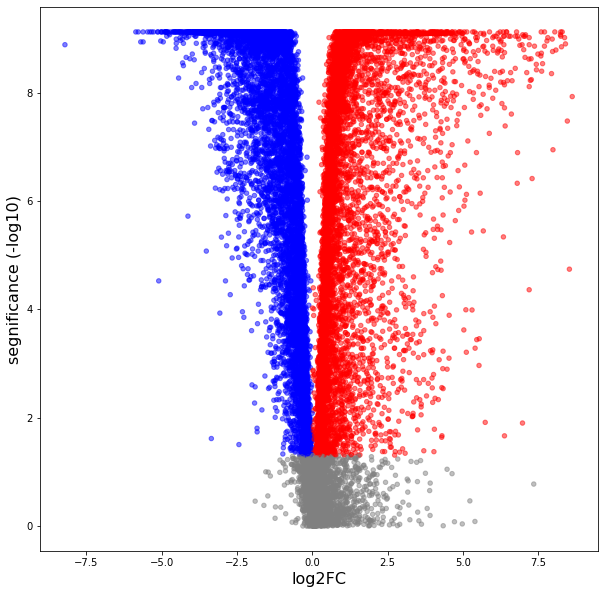

In [26]:
# Volcano Plot after considering Significance level thresholding
plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance (-log10)'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance (-log10)', fontsize=16)
plt.show


In [39]:
# Considering the log-transformed significance level Thresholding and Expression Level colors
cc=['g']*len(FC['expressed'])
for n,val in enumerate(FC['expressed']):
    #Red if Over expressed
    if val== 'over expressed':
        cc[n]='r'
    # Blue If under Expressed
    elif val=='under expressed':
        cc[n]='b'

# Gray if not Expressed
for n,val in enumerate(FC['expressed']):
    if val=='not expressed':
        cc[n]='gray'
        
# Gray for genes with FDR Significance less than -0.05 (But log transformed to base 10
for n,val in enumerate(FC['segnificance (-log10)']):
    if val<-math.log(5/100,10):
        cc[n]='gray'
get_number_of_elements(cc,'b')    

4523


4523

In [40]:
pd.Series(cc).value_counts()

gray    8680
b       4523
r       4072
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

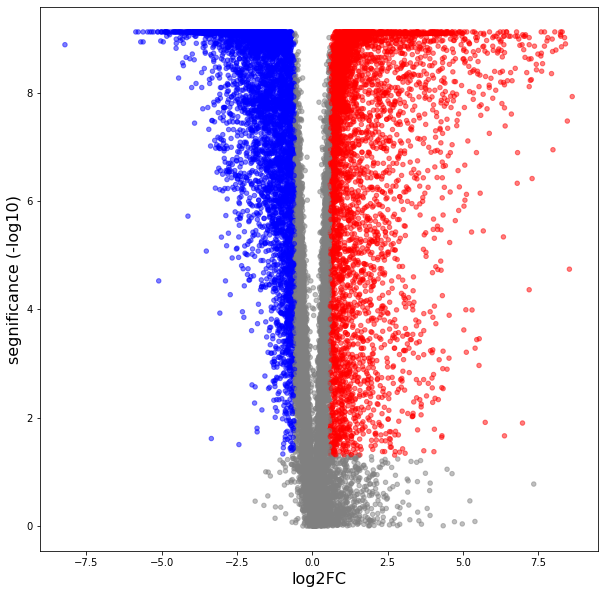

In [28]:
# The Volcano Plot after Considering the log-transformed significance level Thresholding and Expression Level colors
plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance (-log10)'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance (-log10)', fontsize=16)
plt.show

In [30]:
df_segnificant_h=df_healthy.loc[FC['segnificant']== 1]
df_segnificant_h=df_segnificant_h.loc[FC['segnificance (-log10)']>-math.log(5/100,10)]
df_segnificant_h

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309,average_GE
0,0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,...,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25,53.6660
2,2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,...,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17,866.3358
3,3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,...,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91,41.5340
7,7,AKR1C1,1645,1088.92,947.83,684.02,860.08,1096.50,2090.03,1369.04,...,660.68,1051.79,743.43,961.07,1242.34,486.75,417.77,981.29,1733.13,994.0726
8,8,C3orf62,375341,122.64,181.28,181.28,150.17,183.82,117.60,106.63,...,183.82,120.94,84.63,130.60,166.73,198.47,74.58,190.34,135.24,147.4596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,19641,ZNF521,25925,215.77,148.09,83.45,232.94,167.90,80.01,161.02,...,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26,163.5038
17271,19642,SPINT2,10653,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,...,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55,6091.8848
17272,19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,...,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73,512.2180
17273,19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,...,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56,1.9818


In [31]:
df_segnificant_c=df_cancer.loc[FC['segnificant']== 1]
df_segnificant_c=df_segnificant_c.loc[FC['segnificance (-log10)']>-math.log(5/100,10)]
df_segnificant_c

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309,average_GE
0,0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,...,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59,286.4534
2,2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,...,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29,490.3438
3,3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,...,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16,14.0076
7,7,AKR1C1,1645,9945.68,723.08,1023.00,1242.34,136.19,40621.74,660.68,...,1175.27,1143.10,656.11,334.46,52135.28,2133.97,934.76,37379.55,5403.70,12934.2830
8,8,C3orf62,375341,82.29,111.21,59.97,100.83,98.04,112.77,52.08,...,129.69,48.18,167.90,80.01,65.26,104.42,68.55,122.64,84.63,93.9896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,19641,ZNF521,25925,37.32,76.71,59.97,84.04,14.24,202.66,435.55,...,33.78,148.09,106.63,297.17,22.26,25.72,106.63,71.00,37.05,80.3896
17271,19642,SPINT2,10653,56265.94,3901.01,16843.62,12244.81,37901.36,8479.89,9606.86,...,15392.14,20030.74,20593.91,9808.75,11189.60,10733.74,10014.87,6983.79,23169.48,13603.9096
17272,19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,...,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04,203.5698
17273,19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,...,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86,11.5644


In [32]:
# df_segnificant_c.iloc[:,1:].to_csv('cancerous_segnificant.txt',  sep='\t')
# df_segnificant_h.iloc[:,1:].to_csv('healthy_segnificant.txt',  sep='\t')

In [34]:
normal =pd.read_csv('gsea/healthy_segnificant.txt', sep="\t", header=0)
normal

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309,average_GE
0,0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,...,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25,53.6660
1,2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,...,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17,866.3358
2,3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,...,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91,41.5340
3,7,AKR1C1,1645,1088.92,947.83,684.02,860.08,1096.50,2090.03,1369.04,...,660.68,1051.79,743.43,961.07,1242.34,486.75,417.77,981.29,1733.13,994.0726
4,8,C3orf62,375341,122.64,181.28,181.28,150.17,183.82,117.60,106.63,...,183.82,120.94,84.63,130.60,166.73,198.47,74.58,190.34,135.24,147.4596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,17270,ZNF521,25925,215.77,148.09,83.45,232.94,167.90,80.01,161.02,...,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26,163.5038
8591,17271,SPINT2,10653,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,...,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55,6091.8848
8592,17272,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,...,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73,512.2180
8593,17273,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,...,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56,1.9818


In [35]:
cancer =pd.read_csv('gsea/cancerous_segnificant.txt', sep="\t", header=0)
cancer

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309,average_GE
0,0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,...,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59,286.4534
1,2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,...,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29,490.3438
2,3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,...,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16,14.0076
3,7,AKR1C1,1645,9945.68,723.08,1023.00,1242.34,136.19,40621.74,660.68,...,1175.27,1143.10,656.11,334.46,52135.28,2133.97,934.76,37379.55,5403.70,12934.2830
4,8,C3orf62,375341,82.29,111.21,59.97,100.83,98.04,112.77,52.08,...,129.69,48.18,167.90,80.01,65.26,104.42,68.55,122.64,84.63,93.9896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,17270,ZNF521,25925,37.32,76.71,59.97,84.04,14.24,202.66,435.55,...,33.78,148.09,106.63,297.17,22.26,25.72,106.63,71.00,37.05,80.3896
8591,17271,SPINT2,10653,56265.94,3901.01,16843.62,12244.81,37901.36,8479.89,9606.86,...,15392.14,20030.74,20593.91,9808.75,11189.60,10733.74,10014.87,6983.79,23169.48,13603.9096
8592,17272,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,...,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04,203.5698
8593,17273,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,...,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86,11.5644


In [36]:
def get_number_of_elements(list):
    count = 0
    for element in list:
        if element =='r':
            count += 1
    print(count)
    return count

get_number_of_elements(cc)

4072


4072

In [ ]:
# FC['segnificance (-log10)']=-np.log10(paired['fdr'])
# FC.to_csv('FoldChange_fdr.csv')

In [ ]:
# FC['segnificance (-log10)']=-np.log10(paired['p'])
# FC.to_csv('FoldChange_p.csv')

In [5]:
FoldChange =pd.read_csv('filtered/FoldChange_p.csv')
FoldChange

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed,segnificance (-log10)
0,0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0,over expressed,7.996139
1,1,LIN7B,64130,1.090204,0.124599,0.124599,0.0,not expressed,0.622519
2,2,LXN,56925,0.565997,-0.821133,0.821133,1.0,under expressed,5.763144
3,3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0,under expressed,7.897608
4,4,SCML1,6322,0.829034,-0.270496,0.270496,0.0,not expressed,1.795377
...,...,...,...,...,...,...,...,...,...
17270,17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0,under expressed,5.056728
17271,17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0,over expressed,8.320724
17272,17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0,under expressed,8.472781
17273,17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0,over expressed,8.528073


In [8]:
def f(x):  
    if x['log2FC'] > 0 and x['segnificant'] == 1.0 and x['segnificance (-log10)'] >-math.log(5/100,10) : return 'over expressed'
    elif x['log2FC'] < 0 and x['segnificant'] == 1.0 and x['segnificance (-log10)'] >-math.log(5/100,10): return 'under expressed'
    else: return 'not expressed'

# Apply the function on the expression column
FoldChange['VC_expression'] = FoldChange.apply(f, axis=1)
FoldChange

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed,segnificance (-log10),VC_expression
0,0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0,over expressed,7.996139,over expressed
1,1,LIN7B,64130,1.090204,0.124599,0.124599,0.0,not expressed,0.622519,not expressed
2,2,LXN,56925,0.565997,-0.821133,0.821133,1.0,under expressed,5.763144,under expressed
3,3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0,under expressed,7.897608,under expressed
4,4,SCML1,6322,0.829034,-0.270496,0.270496,0.0,not expressed,1.795377,not expressed
...,...,...,...,...,...,...,...,...,...,...
17270,17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0,under expressed,5.056728,under expressed
17271,17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0,over expressed,8.320724,over expressed
17272,17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0,under expressed,8.472781,under expressed
17273,17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0,over expressed,8.528073,over expressed


In [17]:
FoldChange.groupby('VC_expression').count()

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed,segnificance (-log10)
VC_expression,,,,,,,,,
not expressed,8680,8680,8680,8680,8680,8680,8680,8680,8680
over expressed,4072,4072,4072,4072,4072,4072,4072,4072,4072
under expressed,4523,4523,4523,4523,4523,4523,4523,4523,4523


In [16]:
FoldChange.groupby('expressed').count()

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,segnificance (-log10),VC_expression
expressed,,,,,,,,,
not expressed,8140,8140,8140,8140,8140,8140,8140,8140,8140
over expressed,4579,4579,4579,4579,4579,4579,4579,4579,4579
under expressed,4556,4556,4556,4556,4556,4556,4556,4556,4556


In [12]:
FoldChange.loc[FoldChange['VC_expression'] !=FoldChange['expressed']]

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,segnificant,expressed,segnificance (-log10),VC_expression
12,12,GLI1,2735,1.934746,0.952144,0.952144,1.0,over expressed,0.992289,not expressed
35,35,ARHGAP40,343578,1.762771,0.817845,0.817845,1.0,over expressed,0.842809,not expressed
39,39,S100P,6286,4.649174,2.216974,2.216974,1.0,over expressed,1.089186,not expressed
160,160,BAI1,575,2.308458,1.206930,1.206930,1.0,over expressed,0.312444,not expressed
206,206,TLR10,81793,0.362396,-1.464361,1.464361,1.0,under expressed,0.996610,not expressed
...,...,...,...,...,...,...,...,...,...,...
17190,17190,MT3,4504,3.000185,1.585051,1.585051,1.0,over expressed,0.460165,not expressed
17194,17194,FAM19A4,151647,3.755201,1.908890,1.908890,1.0,over expressed,0.906829,not expressed
17201,17201,ST6GAL2,84620,1.913790,0.936433,0.936433,1.0,over expressed,0.029372,not expressed
17224,17224,ENTPD8,377841,2.904320,1.538201,1.538201,1.0,over expressed,1.295781,not expressed
